## Machine learning


*   Lab 02 - 12.10.2018
*   Lab 03



In [0]:
import numpy as np 
import matplotlib.pyplot as plt

### Sample file

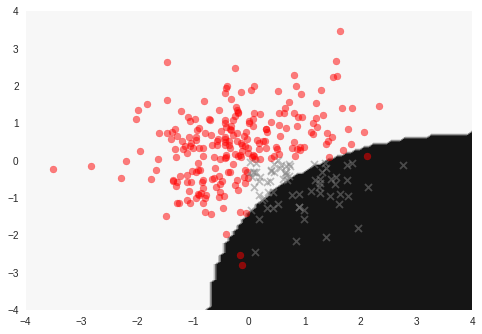

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import math

def sigma(x):
    return 1 / (1 + math.exp( -x ))

def getFakeNeuralNetOutput(x, y):
    firstLayerNeuron1 = sigma(x + 0.01 * y)
    firstLayerNeuron2 = sigma(0.01 * x + y)
    outputLayer1 = sigma( firstLayerNeuron1 -  firstLayerNeuron2 + 0.3)
    outputLayer2 = sigma(-  firstLayerNeuron1 + firstLayerNeuron2 - 0.3)
    return [outputLayer1, outputLayer2]

def getDecisionOfFakeNeuralNet(x, y):
    output = getFakeNeuralNetOutput(x, y)
    return 1 if output[1] > output[0] else 0

def getSamples(N):
    samples = []
    for i in range(N):
        x = np.random.normal()
        y = np.random.normal()
        which = 1 if x > 0 and y < 0 else 0
        samples.append( (x, y, which) )
    return samples

def plotDecisionDomain(listOfX, listOfY, decisionFunction):
    arrayOfX, arrayOfY = np.meshgrid(listOfX, listOfY)
    plt.contourf(arrayOfX, arrayOfY, [[decisionFunction(x, y) for y in listOfY] for x in listOfX])

def plotSamples(samples):
    markers = ['o', 'x']
    colors = ['red', 'gray']
    for sample in samples:
        plt.scatter(sample[0], sample[1],
                    marker = markers[sample[2]], color = colors[sample[2]],
                    alpha = 0.5)

def getGrid(view):
    return [view[0] + (view[1] - view[0]) * i / (view[2] - 1) for i in range(view[2])]

numberOfSamples = 300
samples = getSamples(numberOfSamples)

viewX = [-4, 4, 101]
viewY = [-4, 4, 101]

plotDecisionDomain(getGrid(viewX), getGrid(viewY), getDecisionOfFakeNeuralNet)
plotSamples(samples)
plt.show()


#### Testing np dot

In [0]:
w = np.random.randint(10, size=(2,5))

In [0]:
w

array([[6, 0, 9, 9, 9],
       [5, 1, 5, 1, 9]])

In [0]:
X=[1,2,3,4,5]

In [0]:
np.dot(w,X)

array([114,  71])

In [0]:
np.sum(w*X, axis=1)

array([114,  71])

### Basic Neural Network model

In [0]:
def initialize_weights(layer_dims):
  parameters = {}
  L = len(layer_dims)            # number of layers in the network
  for l in range(1, L):
    parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1])*0.01
  return parameters


def sigmoid(x):
  return 1 / (1 + np.exp(-x))  

  
def forward_propagation(X, parameters):
  #cache = {}
  A = X.copy()
  A.append(-1)                       # add bias 
  L = len(parameters)                # number of layers in the neural network  
  for l in range(1, L+1):
    #cache['A' + str(l)] = A
    W = parameters['W' + str(l)] 
    Z = np.dot(W, A) 
    A = sigmoid(Z)
    #cache['Z' + str(l)] = A
    
  return A, Z

def predict():
  pass


def cost_function(output,target):
  return 1/len(target)*np.sum((output-target)**2)


def update_parametes(L, lerning_rate):
  parameters = {}
  for l in range(1, L+1):
    parameters['W' + str(l)] = parameters['W' + str(l)] - learning_rate * gradients['dW' + str(l)]
  return parameters


def backward_propagation(L,cache):
  gradients = {}
  for l in reversed(range(L)):
    dZ = sigmoid(x)(1-sigmoid(x))
    gradients['dW'+str(l)] = 
  return gradients



In [0]:
def neural network(X,layers_dims, learning_steps=100):
  weights = initialize_weights(layer_dims)
  L = len(layers_dims)
  for step in range(learning_steps):
    A, Z = forward_propagation(X, parameters)
    cost = cost_function(output,target)
    grads = backward_propagation(L,cache)
    weights = update_parametes(L,cache)
    
  
  

In [0]:
X = [0.2, 0.4, 0.8, 0.1]
Y = [1,0]

layers_dims = [len(X)+1, 2, 2] # layer_dims = [input, hidden_layers, output]
weights = initialize_weights(layers_dims)
output = NN_model_forward(X, weights)

[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]

## Mnist dataset

In [83]:
!pip install mnist

In [0]:
import mnist
import scipy.misc

train_images = mnist.train_images()
train_labels = mnist.train_labels()

test_images = mnist.test_images()
test_labels = mnist.test_labels()

/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if issubdtype(ts, int):
/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


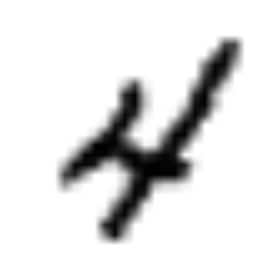

In [14]:
scipy.misc.toimage(scipy.misc.imresize(train_images[9,:,:] * -1 + 256, 10.))

In [15]:
train_images.shape

(60000, 28, 28)

In [0]:
x = train_images.reshape((train_images.shape[0], train_images.shape[1] * train_images.shape[2]))

In [17]:
x.shape

(60000, 784)

In [18]:
train_labels = train_labels.reshape(60000,1)
train_labels.shape

(60000, 1)

In [19]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [20]:
28*28

784

## Coursera

In [0]:
def sigmoid(Z):  
    A = 1/(1+np.exp(-Z))
    cache = Z   
    return A, cache

def relu(Z):
    A = np.maximum(0,Z)
    assert(A.shape == Z.shape)
    cache = Z 
    return A, cache

def relu_backward(dA, cache):
    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.
    # When z <= 0, you should set dz to 0 as well. 
    dZ[Z <= 0] = 0
    assert (dZ.shape == Z.shape)
    return dZ

def sigmoid_backward(dA, cache):
    Z = cache
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    assert (dZ.shape == Z.shape)
    return dZ

In [0]:
def L_layer_model(X, Y, layers_dims, learning_rate=0.05, num_iterations=1000, print_cost=False): #lr was 0.009
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (number of examples, num_px * num_px * 3)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    costs = []  
    
    parameters = initialize_parameters_deep(layers_dims)

    for i in range(0, num_iterations):
        AL, caches = L_model_forward(X, parameters)
        cost = compute_cost(AL, Y)
        grads = L_model_backward(AL, Y, caches)
        parameters = update_parameters(parameters, grads, learning_rate)

        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" % (i, cost))
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

In [0]:
def initialize_parameters_deep(layer_dims):
    parameters = {}
    L = len(layer_dims)            # number of layers in the network
    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1])*0.01 
    return parameters

In [0]:
def linear_activation_forward(A_prev, W, activation):
    """
    Implement the forward propagation for the LINEAR->ACTIVATION layer
    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"
    Returns:
    A -- the output of the activation function, also called the post-activation value 
    cache -- a python dictionary containing "linear_cache" and "activation_cache";
             stored for computing the backward pass efficiently
    """
    Z = np.dot(W,A_prev)
    linear_cache = (A_prev, W)
    if activation == "sigmoid":
        A, activation_cache = sigmoid(Z)
    elif activation == "relu":
        A, activation_cache = relu(Z)
    #print(A.shape)    
    cache = (linear_cache, activation_cache)
    return A, cache

In [0]:
def L_model_forward(X, parameters):
    """
    Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation
    
    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters_deep()
    
    Returns:
    AL -- last post-activation value
    caches -- list of caches containing:
                every cache of linear_activation_forward() (there are L-1 of them, indexed from 0 to L-1)
    """
    caches = []
    A = X
    L = len(parameters)                  # number of layers in the neural network
    for l in range(1, L):
        A, cache = linear_activation_forward(A, parameters['W' + str(l)], activation = "relu") 
        caches.append(cache)       
    AL, cache = linear_activation_forward(A, parameters['W' + str(L)], activation = "sigmoid") 
    caches.append(cache)
    #print(AL.shape)
    #print(X.shape)
    assert(AL.shape == (1,X.shape[1]))           
    return AL, caches

In [0]:
def compute_cost(AL, Y):
    """
    Implement the cost function defined by equation (7).

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost
    """ 
    m = Y.shape[1]
    cost = -1/m*np.sum(Y*np.log(AL)+(1-Y)*np.log(1-AL))    
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(cost.shape == ())   
    return cost

In [0]:
def linear_backward(dZ, cache):
    """
    Implement the linear portion of backward propagation for a single layer (layer l)

    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    A_prev, W = cache
    m = A_prev.shape[1]
    dW = 1/m*np.dot(dZ, A_prev.T)
    dA_prev = np.dot(W.T, dZ)
    return dA_prev, dW

In [0]:
def linear_activation_backward(dA, cache, activation):
    """
    Implement the backward propagation for the LINEAR->ACTIVATION layer.
    
    Arguments:
    dA -- post-activation gradient for current layer l 
    cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"
    
    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    linear_cache, activation_cache = cache 
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
    dA_prev, dW = linear_backward(dZ, linear_cache)    
    return dA_prev, dW

In [0]:
def L_model_backward(AL, Y, caches):
    """
    Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID group
    
    Arguments:
    AL -- probability vector, output of the forward propagation (L_model_forward())
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat)
    caches -- list of caches containing:
                every cache of linear_activation_forward() with "relu" (it's caches[l], for l in range(L-1) i.e l = 0...L-2)
                the cache of linear_activation_forward() with "sigmoid" (it's caches[L-1])
    
    Returns:
    grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 
    """
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL  
    # Initializing the backpropagation
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL)) 
    # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "dAL, current_cache". Outputs: "grads["dAL-1"], grads["dWL"], grads["dbL"]
    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)] = linear_activation_backward(dAL, current_cache, activation = "sigmoid")
 
    # Loop from l=L-2 to l=0
    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        # Inputs: "grads["dA" + str(l + 1)], current_cache". Outputs: "grads["dA" + str(l)] , grads["dW" + str(l + 1)] , grads["db" + str(l + 1)] 
        current_cache = caches[l]
        dA_prev_temp, dW_temp = linear_activation_backward(grads["dA" + str(l+1)], current_cache, activation = "relu")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
    return grads

In [0]:
def update_parameters(parameters, grads, learning_rate):
    L = len(parameters) # number of layers in the neural network
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate*grads["dW" + str(l+1)]
    return parameters

In [0]:
def predict(X, y, parameters):
    m = X.shape[1]
    n = len(parameters)  # number of layers in the neural network
    p = np.zeros((1,m))
    probas, caches = L_model_forward(X, parameters)   
    # convert probas to 0/1 predictions
    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
    print("Accuracy: "  + str(np.sum((p == y)/m)))
    return p

## Testing

In [0]:
train_x = np.random.randn(10,100)
train_y = np.where(np.mean(train_x,axis=0)<0,0,1)
train_y = train_y.reshape(100,1)

In [0]:
layers_dims = [784, 10, 1] 
parameters = L_layer_model(x.T, train_labels, layers_dims, num_iterations = 1000, print_cost = True)

In [0]:
layers_dims = [784,  10, 1] 
parameters = L_layer_model(train_x, train_y, layers_dims, num_iterations = 1000, print_cost = True)